## El Namer Ayman

## Exercise number 5.

In [75]:
#matplotlib inline
%matplotlib inline

In [76]:
#Load libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Introduction of values and the case, and the plotting of Cl and Cd

<br>The case of Tutorial 3 will be studied in an unsteady flow in Fluent. It will use LES simulation (Large Eddy Symmetry), with the following values that are hypothesized:
<br>

<font size="2">$U=0.9 \frac{m}{s}$</font>

<font size="2">$ρ=1 \frac{kg}{m^{3}}$</font>
    
<font size="2">$μ=0.000125 \frac{kg}{m s}$</font>

<font size="2">$L=1 m$</font>

<br>
From which I calculate the Reynolds number, in our case the value is of
<br>

<font size="2">$Re=7500$</font>

In [77]:
#Load data using numpy.

cd = np.loadtxt('cdplot.out',skiprows=3)
cl = np.loadtxt('clplot.out',skiprows=3)
cdfft = np.loadtxt('cdfft.out',skiprows=3)
clfft = np.loadtxt('clfft.out',skiprows=3)

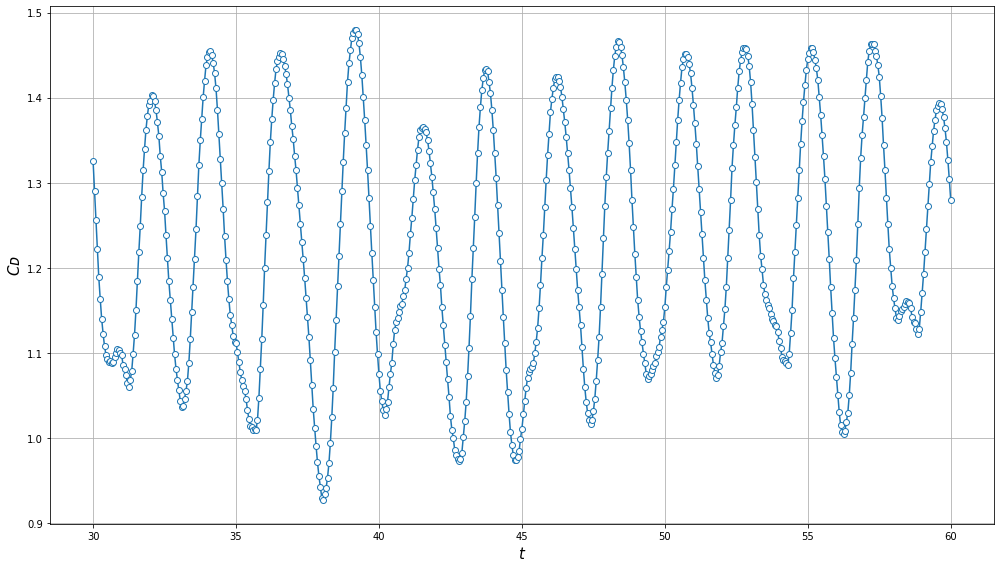

In [78]:
#Plot drag coefficient in time

plt.figure(figsize=(14,8))

#Fluent solution for turbulent quantity, Re=7500
plt.plot(cd[:,0],cd[:,1],'-o',ms=6,markerfacecolor='white',zorder=8)

plt.grid()

plt.xlabel('$t$', fontsize=15)
plt.ylabel('$Cᴅ$', fontsize=15)

plt.tight_layout()

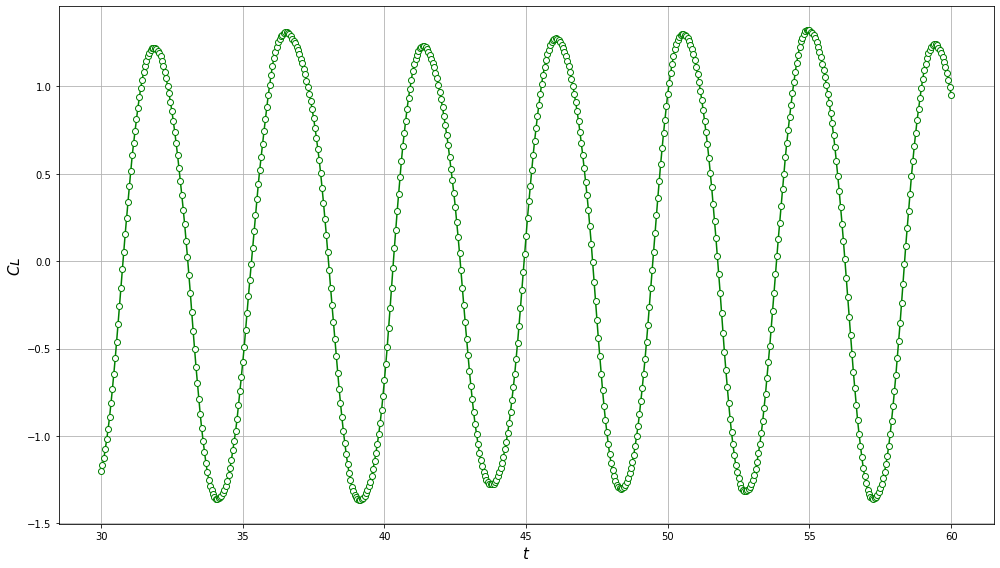

In [79]:
#Plot lift coefficient in time

plt.figure(figsize=(14,8))

#Fluent solution for turbulent quantity, Re=7500
plt.plot(cl[:,0],cl[:,1],'-o',ms=6,markerfacecolor='white',color="green",zorder=8)
plt.grid()

plt.xlabel('$t$', fontsize=15)
plt.ylabel('$Cʟ$', fontsize=15)

plt.tight_layout()

In [80]:
#I am locating the max value, min value, mean value, variance and standard deviation, now:

maxcd=max(cd[:,1])
mincd=min(cd[:,1])
meancd=np.mean(cd[:,1])
varcd=np.var(cd[:,1])
stdcd=np.std(cd[:,1])

maxcl=max(cl[:,1])
mincl=min(cl[:,1])
meancl=np.mean(cl[:,1])
varcl=np.var(cl[:,1])
stdcl=np.std(cl[:,1])


print('Maximum drag Coefficient = ',maxcd)
print('Minimum drag coefficient = ',mincd)
print('Mean drag coefficient = ',meancd)
print('Drag coefficient variance = ',varcd)
print('Standard deviation lift coefficient = ',stdcd)
print('')
print('Maximum lift coefficient = ',maxcl)
print('Minimum lift coefficient = ',mincl)
print('Mean lift coefficient = ',meancl)
print('Lift coefficient variance = ', varcl)
print('Standard deviation drag coefficient = ',stdcl)

Maximum drag Coefficient =  1.4795435
Minimum drag coefficient =  0.92693763
Mean drag coefficient =  1.2246437340931782
Drag coefficient variance =  0.021515646316923705
Standard deviation lift coefficient =  0.14668212678074893

Maximum lift coefficient =  1.3230098
Minimum lift coefficient =  -1.3679624
Mean lift coefficient =  0.05701554792445924
Lift coefficient variance =  0.9000991615286085
Standard deviation drag coefficient =  0.9487355593254679


## FFT, the introduction of the files and the Strouhal number.

The files of FFT were studies with a range that goes from time 30s to 60s as it is shown to the previous plots above. This means that in FFt the maximum value of the Cl of the power spectral density is quite higher than cd, as it is oscillating with a much wider range than the latter. To which we can see below, the comparison of the 2 plots, and it is also shwocased that the maximum shedding frequency of the drag coefficient is doubled, compared to the lift coefficient.

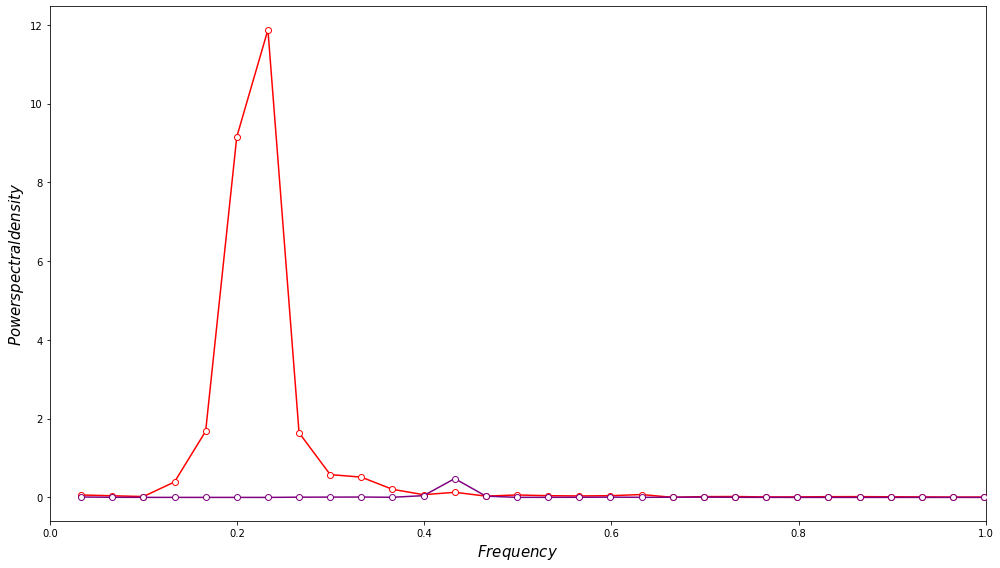

In [91]:
#Plot Power spectral desnity

plt.figure(figsize=(14,8))

#Fluent solution for turbulent quantity, Re=7500
plt.plot(clfft[:,0],clfft[:,1],'-o',ms=6,markerfacecolor='white',color="red",label='Lift coefficient',zorder=8)

#Fluent solution for turbulent quantity, Re=7500
plt.plot(cdfft[:,0],cdfft[:,1],'-o',ms=6,markerfacecolor='white',color="purple",label='Drag coefficient',zorder=8)

axes = plt.gca()
axes.set_xlim([0,1])

plt.xlabel('$Frequency$', fontsize=15)
plt.ylabel('$Power spectral density$', fontsize=15)

plt.tight_layout()

In [82]:
maxcdfft=max(cdfft[:,1])
pos_maxclfft = np.where(clfft[:,1] == max(clfft[:,1]))
maxfreqcl=(clfft[pos_maxclfft,0])

pos_maxcdfft = np.where(cdfft[:,1] == max(cdfft[:,1]))
maxfreqcd=(cdfft[pos_maxcdfft,0])

print('Maximum shedding frequency of lift coefficient = ',maxfreqcl)
print('Maximum shedding frequency of drag coefficient = ',maxfreqcd)

Maximum shedding frequency of lift coefficient =  [[0.23294508]]
Maximum shedding frequency of drag coefficient =  [[0.4326123]]


## Evaluation of the Strouhal number.

As we can see, the shedding frequency of the lift coefficient and of the drag coefficient are roughly one the double of the other. Specifically, the highest one is the drag's, which is a little less than double of the lift coefficient, and as stated, it does not necessairly happen, but in this case and geometry the behavior and the relation of the shedding frequency are twice.

Since the Strouhal number is calculated at such equation:

<font size="4">$St=\frac{fL}{v}$</font>

We will calculate below the Strouhal numbers for lift coefficient and drag coefficient at shedding frequency. As we can see, the values are now much much closer to being related as one double than the other.

In [83]:
stcd=maxfreqcd*1/0.9
stcl=maxfreqcl*1/0.9

print('Strouhal number of drag coefficient shedding = ',stcd)
print('Strouhal number of lift coefficient shedding = ',stcl)

Strouhal number of drag coefficient shedding =  [[0.48068033]]
Strouhal number of lift coefficient shedding =  [[0.25882787]]


## Image showcase of contours and vector

And for last, they will be showcased the contours of the velocity, pressure, vorticity and the vector velocity, the images will be showcased below. In order:

Velocity contours: https://i.imgur.com/zifb6kj.jpg

Pressure contours: https://i.imgur.com/bOWh1lk.jpg

Vorticity contours: https://i.imgur.com/TCt5pcC.jpg

(It's a smaller range, between around 15 and -15, since the default didn't show alot of difference in the domain)

Velocity vectors: https://i.imgur.com/zL4ptcP.jpg

## Videos of pressure and velocity contours via time

Here, then, I will showcase the videos of the evolution of respectively velocity and pressure in the contours, from frame 0 to 300, with an increment of 15 for the objective to speed up the video.

https://www.youtube.com/watch?v=5fjMly-I9Uw

https://www.youtube.com/watch?v=lW-865ATlM0

## Question 1: Why is the drag shedding frequency double of the lift shedding frequency?

The frequency of the drag force is double compared to the lift force on a cylinder, such it is caused by the vortex shedding that occurs in top and bottom, let's say, in this case the vortex is from the edges of the cylinder itself, which one is on the top and one on the bottom, and thus it creates 2 vortexes that are opposed one another and equal in strength. The difference is that the lift is sensitive to the sign of the cylinder, while the drag is not and for this reason, the drag has it's period doubled compared to the lift.

In other words, the lift coefficient is functional to the vector y, so it is feeling both top and bottom the frequency of the shedding. The drag force doesnt feel the sign as it is a value that goes parallel, or more so horizontal to the cylinder. For such reason the cycle of the drag will be much quicker than the lift, as it is shown in the graph above, and less time means higher frequency, for which why drag has higher frequency.

I would say that the frequency that we should consider best would be the lift coefficient.

## Question 2: Which criteria is used to stop iterating an unsteady simulation?

I personally stopped the simulation around 60 seconds, but in an unsteady simulation I just wait and see how it is oscillating. If the oscillations are still very very different and not periodic, with max and min values that change alot from cycle to cycle, I don't find acceptable to stop the iteration, thus I wait until the oscillations of lift and drag turn out to be quite periodic and cycle properly, with little differences from previous cycles. On that point I would stop iterating and start the post processing.

## Optional requests. Study via the PISO case (without non-iterative marching)

The case will have the same boundary conditions, LES simulation. The only difference will be that the case will me studied with the PISO method, after we unchecked the non-iterative time advancement. Thus the case will show the following plots of lift and drag coefficient in function of time, of course again filtering it from time 30 to 60, and hybrid inizialization.

Time step size 0.05

Number of time steps 10000

And also, I will plot for convenience in the same figure CL and CD. Showcasing which is which via a small legend which will state which color is which variable.

In [84]:
cdPISO = np.loadtxt('cdsignalPISO.out',skiprows=3)
clPISO = np.loadtxt('clsignalPISO.out',skiprows=3)
cdfftPISO = np.loadtxt('cdfftPISO.out',skiprows=3)
clfftPISO = np.loadtxt('clfftPISO.out',skiprows=3)

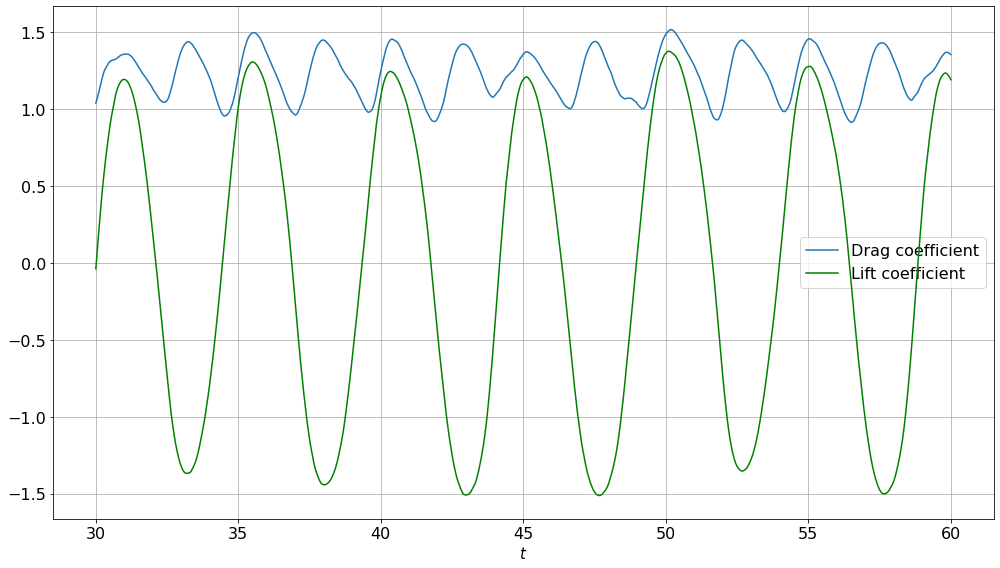

In [85]:
plt.figure(figsize=(14,8))

plt.plot(cdPISO[:,0],cdPISO[:,1],ms=6,markerfacecolor='white',label='Drag coefficient',zorder=8)

plt.plot(clPISO[:,0],clPISO[:,1],ms=6,label='Lift coefficient',color='green',zorder=8)

plt.grid()
plt.tick_params(labelsize=16)
plt.legend(loc=0,fontsize=16)

plt.xlabel('$t$', fontsize=15)

plt.tight_layout()

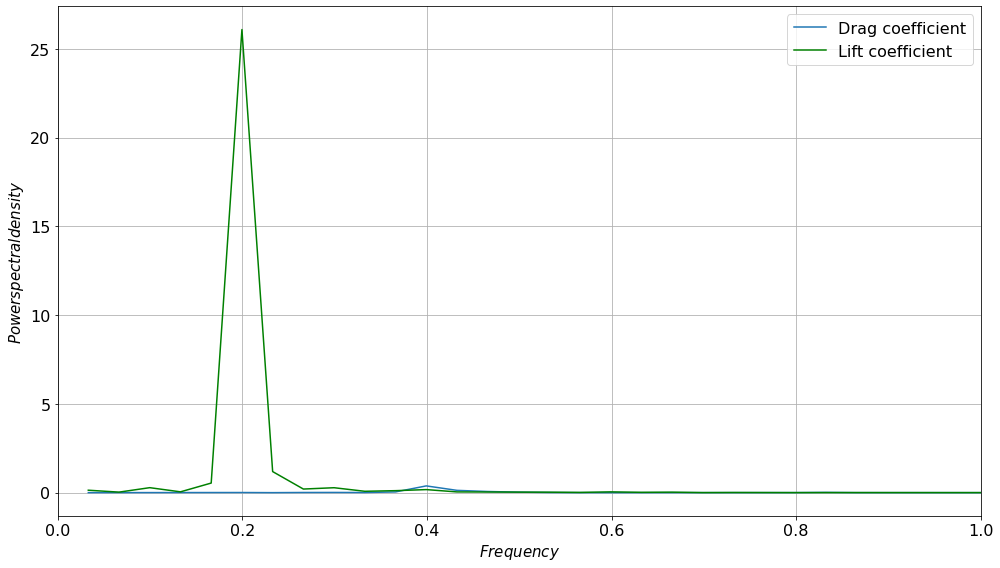

In [86]:
plt.figure(figsize=(14,8))


plt.plot(cdfftPISO[:,0],cdfftPISO[:,1],ms=6,markerfacecolor='white',label='Drag coefficient',zorder=8)

plt.plot(clfftPISO[:,0],clfftPISO[:,1],ms=6,label='Lift coefficient',color='green',zorder=8)

plt.grid()
plt.tick_params(labelsize=16)
plt.legend(loc=0,fontsize=16)

plt.xlabel('$Frequency$', fontsize=15)
plt.ylabel('$Power spectral density$', fontsize=15)

axes = plt.gca()
axes.set_xlim([0,1])

plt.tight_layout()

In [87]:
maxcdfftPISO=max(cdfftPISO[:,1])
pos_maxclfftPISO = np.where(clfftPISO[:,1] == max(clfftPISO[:,1]))
maxfreqclPISO=(clfft[pos_maxclfftPISO,0])

pos_maxcdfftPISO = np.where(cdfftPISO[:,1] == max(cdfftPISO[:,1]))
maxfreqcdPISO=(cdfftPISO[pos_maxcdfftPISO,0])

print('Maximum shedding frequency of lift coefficient = ',maxfreqclPISO)
print('Maximum shedding frequency of drag coefficient = ',maxfreqcdPISO)

Maximum shedding frequency of lift coefficient =  [[0.19966722]]
Maximum shedding frequency of drag coefficient =  [[0.39933443]]


## My thoughts on comparison between PISO and Fractional

The calculation appeared to be quite a bit longer, and as I checked, it's algorithm performs additional corrections, neighbor and skewness correction. The values seemed to be a little more refined compared to the first case, and as I will showcase the images below, the velocity in particular no longer presents the velocity-null area at the right, the frequency also seems to be a little more accurate, as the max shedding frequency is much closer to be cd the double of cl, compared to the first case.

Velocity contours: https://i.imgur.com/PJGwbww.jpg

Pressure contours: https://i.imgur.com/GMZZgSg.jpg

## Optional request: Study of a case with CFL>10

To do such case, I will increase the time step of a much bigger value, in our case I will impose our timestep of 0.2; same mesh and same number of iteration and the range will still be studied between 30 and 60 seconds.

Again, the values of density, velocity inlet and viscosity will be the same as the first and second case. The initialization will still be a hybrid one.

In [88]:
cdhighCFL = np.loadtxt('cdsignalCFLhigh.out',skiprows=3)
clhighCFL = np.loadtxt('clsignalCFLhigh.out',skiprows=3)
cdffthighCFL = np.loadtxt('cdfftCFLhigh.out',skiprows=3)
clffthighCFL = np.loadtxt('clfftCFLhigh.out',skiprows=3)

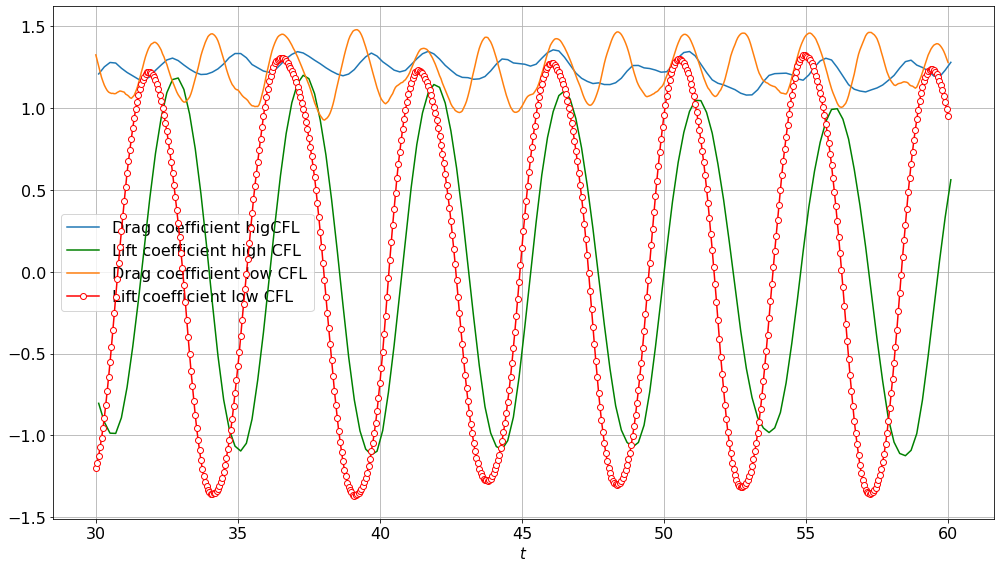

In [89]:
#Plot drag coefficient

plt.figure(figsize=(14,8))

#Fluent solution for turbulent quantity, Re=7500
plt.plot(cdhighCFL[:,0],cdhighCFL[:,1],ms=6,markerfacecolor='white',label='Drag coefficient higCFL',zorder=8)

plt.plot(clhighCFL[:,0],clhighCFL[:,1],ms=6,label='Lift coefficient high CFL',color='green',zorder=8)

plt.plot(cd[:,0],cd[:,1],ms=6,markerfacecolor='white',label='Drag coefficient low CFL',zorder=8)

plt.plot(cl[:,0],cl[:,1],'-o',ms=6,markerfacecolor='white',color="red",label='Lift coefficient low CFL',zorder=8)

plt.grid()
plt.tick_params(labelsize=16)
plt.legend(loc=0,fontsize=16)

plt.xlabel('$t$', fontsize=15)

plt.tight_layout()

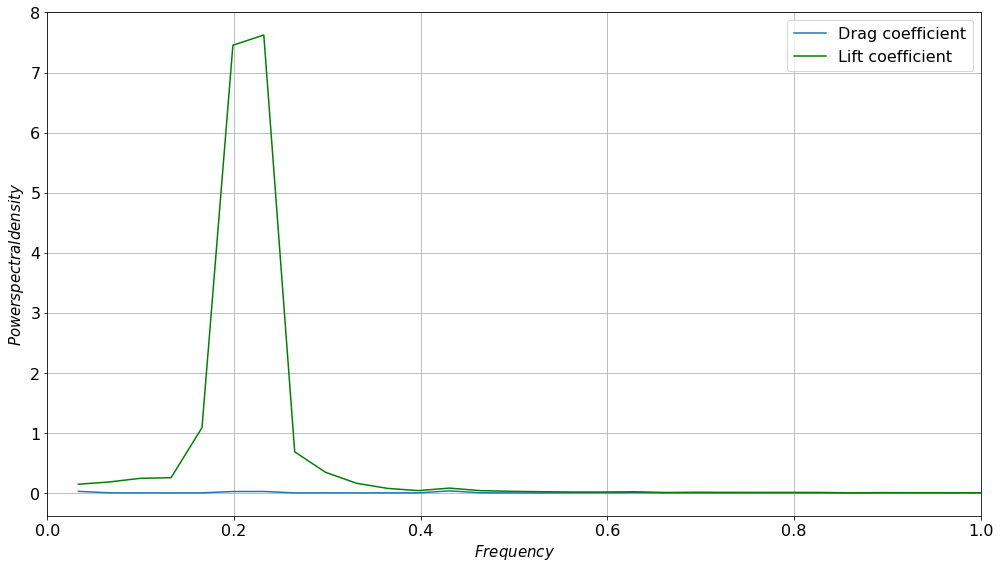

In [90]:
#Plot drag coefficient

plt.figure(figsize=(14,8))

#Fluent solution for turbulent quantity, Re=7500
plt.plot(cdffthighCFL[:,0],cdffthighCFL[:,1],ms=6,markerfacecolor='white',label='Drag coefficient',zorder=8)

plt.plot(clffthighCFL[:,0],clffthighCFL[:,1],ms=6,label='Lift coefficient',color='green',zorder=8)

plt.grid()
plt.tick_params(labelsize=16)
plt.legend(loc=0,fontsize=16)

plt.xlabel('$Frequency$', fontsize=15)
plt.ylabel('$Power spectral density$', fontsize=15)

axes = plt.gca()
axes.set_xlim([0,1])

plt.tight_layout()

## Analysis and showcase of high CFL results

The plots seems to show still a relatively still a low periodicity of both CL and CD, particularly of CD. The case was calculated at a much much higher speed, but the fft and the plots may show some margin of errors compared to a more accurate case which would be our first case, where our CFL was around 4.
As much as the graphs may be seeming crowded in comparison, we can see that CL and CD have a much steadier and periodic behavior at a lower CFL, which concludes that even if my computer was able to run it faster, the approximation is much much worse, creating margin errors that are not acceptable. Considering also that the behavior at the wake is barely acceptable, due to still being some velocity there, hence being light blue.

Increasing time step is not the only way to have such a result of CFL>10, the mesh directly influences as well such value and behavior in time of variables, if the mesh has a worse quality per say, the CFL will turn out to be higher.

Velocity contours: https://i.imgur.com/iLzQfBs.jpg

Pressure contours: https://i.imgur.com/CyPrLdq.jpg